### Импорт библиотек

In [1]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df_licenses = pd.read_json('./licenses_20210411.json')

In [3]:
df_licenses.shape

(371134, 15)

### EDA

In [4]:
df_licenses.head(2).T

,0,1
Наименование лицензирующего органа,Министерство здравоохранения Свердловской области,Министерство здравоохранения Свердловской области
Лицензируемый вид деятельности,Фармацевтическая деятельность,Фармацевтическая деятельность
Полное наименование лицензиата,"Общество с ограниченной ответственностью ""Ригл...","Общество с ограниченной ответственностью ""Ригл..."
Сокращенное наименование лицензиата,ООО «Ригла-Екатеринбург»,ООО «Ригла-Екатеринбург»
Фирменное наименование лицензиата,"Общество с ограниченной ответственностью ""Ригл...","Общество с ограниченной ответственностью ""Ригл..."
Организационно-правовая форма,Общество с ограниченной ответственностью,Общество с ограниченной ответственностью
ИНН лицензиата,6.67113e+09,6.67113e+09
Дата выдачи лицензии,21.09.2018,21.09.2018
Дата прекращения действия лицензии,NaN,NaN
"Выполняемые работы, оказываемые услуги",03. хранение лекарственных препаратов для меди...,06. розничная торговля лекарственными препарат...


### Отберем только адреса Оренбурга

In [5]:
df_oren_obl = df_licenses.loc[df_licenses['Регион'] == 'Оренбургская область', :]

### Отберем только лицензии на розницную торговлю

In [30]:
# Число униальных видов работ
df_oren_obl['Выполняемые работы, оказываемые услуги'].nunique()

14

In [36]:
list(
    df_oren_obl['Выполняемые работы, оказываемые услуги'].unique()
)

['3. хранение лекарственных препаратов для медицинского применения',
 '7. отпуск лекарственных препаратов для медицинского применения',
 '6. розничная торговля лекарственными препаратами для медицинского применения',
 '2. хранение лекарственных средств для медицинского применения',
 '8. изготовление лекарственных препаратов для медицинского применения',
 '1. оптовая торговля лекарственными средствами для медицинского применения',
 '4. перевозка лекарственных средств для медицинского применения',
 '5. перевозка лекарственных препаратов для медицинского применения',
 None,
 '2. Розничная торговля лекарственными средствами без права изготовления лекарственных средств',
 '1. Оптовая торговля',
 '4. Без права изготовления',
 '2. Розничная торговля лекарственными средствами с правом работы с сильнодействующими и ядовитыми веществами списков ПККН',
 'Розничная торговля лекарственными средствами без права работы с сильнодействующими и ядовитыми веществами, согласно списков ПККН',
 '1. Рознична

In [37]:
works = [
    '6. розничная торговля лекарственными препаратами для медицинского применения',
    '2. Розничная торговля лекарственными средствами без права изготовления лекарственных средств',
    'Розничная торговля лекарственными средствами без права работы с сильнодействующими и ядовитыми веществами, согласно списков ПККН',
    '1. Розничная торговля лекарственными средствами без права работы с сильнодействующими и ядовитыми веществами списков ПККН'
]

In [41]:
df_oren_obl = df_oren_obl.loc[df_oren_obl['Выполняемые работы, оказываемые услуги'].isin(works), :]

### Организационно-правовая форма

In [64]:
df_oren_obl['Организационно-правовая форма'].unique().tolist()

['Индивидуальный предприниматель',
 'Общество с ограниченной ответственностью',
 'Государственное автономное учреждение',
 'Государственное бюджетное учреждение',
 'Автономное учреждение',
 'Бюджетное учреждение',
 'Закрытое акционерное общество',
 'Акционерное общество',
 'Частное учреждение',
 'Федеральное государственное автономное учреждение',
 'Федеральное казенное учреждение здравоохранения',
 'Федеральное государственное бюджетное образовательное учреждение']

In [72]:
OOF_list = [
#     'Индивидуальный предприниматель',
#     'Общество с ограниченной ответственностью',
#     'Государственное автономное учреждение',
#     'Государственное бюджетное учреждение',
    'Автономное учреждение',
#     'Бюджетное учреждение',
    'Закрытое акционерное общество',
    'Акционерное общество',
#     'Частное учреждение',
#     'Федеральное государственное автономное учреждение',
#     'Федеральное казенное учреждение здравоохранения',
#     'Федеральное государственное бюджетное образовательное учреждение'
]

for i in OOF_list:
    print(
        i, '\n',
        df_oren_obl.loc[df_oren_obl['Организационно-правовая форма'] == i,
                        'Сокращенное наименование лицензиата'].unique())

Автономное учреждение 
 ['ГАУЗ "ОАС"']
Закрытое акционерное общество 
 ['ЗАО "ЦРА № 77" с. Курмаевка' 'ЗАО "Аптека №20"' 'ЗАО "Гайфармация"'
 'ЗАО "ЦРА № 88"' 'ЗАО «Матвеевкафармация»' 'ЗАО "ЦРА "№']
Акционерное общество 
 ['АО "Тандер"']


#### Уберем лишнее

In [77]:
OOF_list = [
    'Индивидуальный предприниматель',
    'Общество с ограниченной ответственностью',
    'Автономное учреждение',
    'Закрытое акционерное общество',
    'Акционерное общество',
]

df_oren_obl = df_oren_obl.loc[df_oren_obl['Организационно-правовая форма'].isin(OOF_list), :]

In [86]:
df_oren_obl.loc[:, 'Сведения о переоформлении лицензии'].nunique()

0

### Только нужные столбцы

In [105]:
features = [
#     'Наименование лицензирующего органа',
#     'Лицензируемый вид деятельности',
    'Полное наименование лицензиата',
#     'Сокращенное наименование лицензиата',
#     'Фирменное наименование лицензиата',
    'Организационно-правовая форма',
    'ИНН лицензиата',
    'Дата выдачи лицензии',
#     'Дата прекращения действия лицензии',
    'Выполняемые работы, оказываемые услуги',
    'Адрес места осуществления лицензируемого вида деятельности',
#     'Регион',
    'Населенный пункт',
    'Улица, дом, офис и т.д.',
#     'Сведения о переоформлении лицензии'
]

In [107]:
# Отберем столбцы
df_oren_obl = df_oren_obl[features]

In [112]:
df_oren_obl['Дата выдачи лицензии'] = pd.to_datetime(df_oren_obl['Дата выдачи лицензии'])

<ipython-input-112-6627d8b0ce36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oren_obl['Дата выдачи лицензии'] = pd.to_datetime(df_oren_obl['Дата выдачи лицензии'])


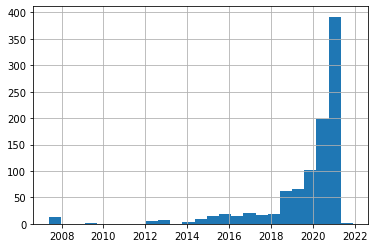

In [117]:
df_oren_obl['Дата выдачи лицензии'].hist(bins=25);

In [177]:
l2 = ['г.Оренбург', 'город Оренбург', 'Оренбург', 'Оренбург город']

df_oren = df_oren_obl.loc[df_oren_obl['Населенный пункт'].isin(l2), :]

In [187]:
pivot_oren = pd.pivot_table(df_oren,
               index=[
                   'Полное наименование лицензиата',
                   'Организационно-правовая форма', 
                   'ИНН лицензиата', 
                   'Адрес места осуществления лицензируемого вида деятельности'
               ],
               aggfunc='count') \
    .reset_index()

pivot_oren

,Полное наименование лицензиата,Организационно-правовая форма,ИНН лицензиата,Адрес места осуществления лицензируемого вида деятельности,"Выполняемые работы, оказываемые услуги",Дата выдачи лицензии,Населенный пункт,"Улица, дом, офис и т.д."
0,"Акционерное общество ""Тандер""",Акционерное общество,2.310031e+09,"460000, Оренбургская область, г. Оренбург, ул....",1,1,1,1
1,"Акционерное общество ""Тандер""",Акционерное общество,2.310031e+09,"460000, Оренбургская область, г. Оренбург, ули...",1,1,1,1
2,"Акционерное общество ""Тандер""",Акционерное общество,2.310031e+09,"460004, Оренбургская область, г. Оренбург, пр-...",1,1,1,1
3,"Акционерное общество ""Тандер""",Акционерное общество,2.310031e+09,"460005, Оренбургская область, г. Оренбург, пр-...",1,1,1,1
4,"Акционерное общество ""Тандер""",Акционерное общество,2.310031e+09,"460008, Оренбургская область, г. Оренбург, пос...",1,1,1,1
...,...,...,...,...,...,...,...,...
319,Общество с ограниченной ответственностью «ЖИВИЦА»,Общество с ограниченной ответственностью,5.638074e+09,"460052, Оренбургская область, г. Оренбург, ул....",1,1,1,1
320,Общество с ограниченной ответственностью «ЖИВИЦА»,Общество с ограниченной ответственностью,5.638074e+09,"460060, Оренбургская область, г. Оренбург, ули...",1,1,1,1
321,Общество с ограниченной ответственностью «Клин...,Общество с ограниченной ответственностью,5.610065e+09,"46001, Оренбургская область, г. Оренбург, пер....",1,1,1,1
322,Общество с ограниченной ответственностью «Межд...,Общество с ограниченной ответственностью,5.612038e+09,"460018, Оренбургская область, г. Оренбург, пр....",1,1,1,1


In [197]:
pivot_oren[['Полное наименование лицензиата', 'Организационно-правовая форма', 
            'Адрес места осуществления лицензируемого вида деятельности']]\
    .rename(columns={'Полное наименование лицензиата': 'Наименование',
                     'Организационно-правовая форма': 'Форма',
                     'Адрес места осуществления лицензируемого вида деятельности': 'Адрес'}) \
    .head()

,Наименование,Форма,Адрес
0,"Акционерное общество ""Тандер""",Акционерное общество,"460000, Оренбургская область, г. Оренбург, ул...."
1,"Акционерное общество ""Тандер""",Акционерное общество,"460000, Оренбургская область, г. Оренбург, ули..."
2,"Акционерное общество ""Тандер""",Акционерное общество,"460004, Оренбургская область, г. Оренбург, пр-..."
3,"Акционерное общество ""Тандер""",Акционерное общество,"460005, Оренбургская область, г. Оренбург, пр-..."
4,"Акционерное общество ""Тандер""",Акционерное общество,"460008, Оренбургская область, г. Оренбург, пос..."


In [195]:
pivot_oren[['Полное наименование лицензиата', 'Организационно-правовая форма', 
            'Адрес места осуществления лицензируемого вида деятельности']]\
    .rename(columns={'Полное наименование лицензиата': 'Наименование',
                     'Организационно-правовая форма': 'Форма',
                     'Адрес места осуществления лицензируемого вида деятельности': 'Адрес'}) \
    .to_csv(path_or_buf='Pharmacies_in_Orenburg.csv')